In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

# Time-Evolution of a Gaussian Wavepacket through a Rectangular Potential Well

In this notebook, we simulate a well-known problem in quantum mechanics: the time-evolution of a particle through a rectangular potential well. This problem is often addressed in introductory courses on quantum mechanics because it can be solved analytically, offering insight into a curious and peculiar behavior of quantum particles known as **tunneling** over a potential barrier.

In classical mechanics, a particle with a given kinetic energy $K$ cannot surpass a potential barrier $𝑉$, with $V>K$. For example, if there is a hill at 
$x$ representing a certain potential energy $V(x)$, a ball with kinetic energy $K$ moving towards the hill will never surpass it if $K<V(x)$. However, according to quantum mechanics, the particle must be represented by a *wavefunction*, which is defined over the entire space. When the wavefunction encounters the potential barrier (the hill), it can be demonstrated that there will always be a non-zero probability of finding the particle beyond it. In particular, this probability is significant if the width of the wavepacket is greater than the width of the barrier.

In the following sections, we will provide a theoretical introduction to the problem, briefly discussing the properties of Gaussian wavepackets, their time-evolution, and how to calculate tunneling probabilities. Subsequently, we will write code to simulate the system and generate an animation demonstrating tunneling phenomena.

## Gaussian wavepacket

Let consider the time-independent Schrodinger equation for a free particle in 1D:
$$
-\frac{\hbar^2}{2m}\frac{d\psi}{dx^2} = \epsilon \psi
$$
We know that a function solving such kind of differential equations can be choosen in the following form:
$$
\psi(x) \propto e^{\pm i\alpha x}
$$
From this ansatz, we find that $\epsilon = (\hbar \alpha)^2/(2m)$, therefore if $(\hbar \alpha)$ is a momentum, $p$, then $\epsilon = p^2/2m$ is the kinetic energy of the particle. Actually, $\hbar \alpha = p$, if $\alpha$ is the wave-vector $k$; therefore, the "true" solution of the above equation becomes $e^{\pm ikx}$, i.e. a *plane wave* propagating with wavevector $k$. We are interested in a *time-dependent* problem, i.e. we want to solve the following **time-dependent Schrodinger equation**:
$$
i\hbar\frac{\partial \Psi}{\partial t} = H\Psi
$$
Since $\epsilon \psi$ is a time-indendepent term, we can assume the solution $\Psi$ to be of the form $\Psi(x,t)=\psi(x)\chi(t)$, therefore:
$$
i\hbar\frac{\partial \chi}{\partial t} = -\frac{\hbar^2k^2}{2m}\chi(t)
$$
that can be solved to give:
$$
\chi(t)=\chi(0) e^{-it\frac{\hbar k^2}{2m}}
$$
Hence, we can write the final solution as $\Psi(x,t) = \exp(ikx)\exp\left(-it \frac{\hbar k^2}{2m}\right)$. However, in general our wavefunction will be a superposition of plane waves of different wavevectors $k_i$, therefore a more complete solution is given by:
$$
\Psi(x,t) = \int_{-\infty}^{+\infty} a(k) \exp(ikx)\exp\left(-it \frac{\hbar k^2}{2m}\right) dk
$$
Notice that we have used a "continuous sum", i.e. an integral over $k$, because a *free* particle is characterized by a continuous energy spectrum. The above equation can be considered as a general form for a wavepacket represeting a free particle and can be easily generalized to more dimension. However, let's stick to the 1D case and let choose the term $a(k)$ to give the wavepacket a specific form. In particular, we can find $a(k)$ so that the wavefunction has a **Gaussian** form at time 0, representing then a sort of *localized* particle, depending on its variance. In particular, we set:
$$
\Psi(x,0) = Ne^{-ax^2}
$$
where $N$ is a normalization costant. At time 0, the time-dependent Schrodinger equation reads as:
$$
Ne^{-ax^2} = \int_{-\infty}^{+\infty}a(k)e^{ikx}dk
$$
multiplying both sides by $e^{-ik'x}$ and integrating over $dx$:
$$
\begin{gather}
\int_{-\infty}^{+\infty}e^{-ik'x}Ne^{-ax^2}dx = \int_{-\infty}^{+\infty} dk \int_{\infty}^{+\infty}e^{i(k-k')x}a(k)dx \\
N\int_{-\infty}^{+\infty} e^{-ax^2-ik'x}dx = 2\pi \int_{-\infty}^{+\infty} \delta(k-k')a(k)dk = 2\pi a(k')
\end{gather}
$$
The term on the left side can be integrated analytically. We skip here the simple but lenghty calculation, to give the final result:
$$
a(k') = N \sqrt{\frac{1}{4\pi a}} \exp\left( -\frac{k'^2}{4a}\right)
$$
Therefore, we can write our Gaussian wavepacket as:
$$
\Psi(x,t) =  N \sqrt{\frac{1}{4\pi a}} \int_{-\infty}^{+\infty} \exp\left( -\frac{k^2}{4a}\right) \exp(ikx)\exp\left(-it \frac{\hbar k^2}{2m}\right) dk
$$
The Gaussian integral over $k$ can be solved analytically. Again, we skip such calculations to give the final result in a more coincise form:
$$
\Psi(x,t) = N\exp\left(-\alpha_t x^2\right)\exp\left(i\frac{\gamma_t}{\hbar}\right)
$$
where
$$
\begin{gather}
\alpha_t = \frac{a}{1+(2i\hbar ta)/m} \\
\gamma_t = -\frac{\hbar}{2i}\ln\left(1+\frac{2i\hbar ta}{m}\right)
\end{gather}
$$
Therefore, it suffices to know the initial Gaussian amplitude $a$ to have the wavepacket evolution at each time. Let write a Python function to plot the wavepacket at a given time to show its form:

In [261]:
# Defining a grid of points
x = np.linspace(0,1000,1001)

In [262]:
def approx_integral(f, dx, axis = 0) -> float:
    '''
    Function to approximate integral in discrete space

    :params f: the function (y) values a np.array
    :params dx: the discrete differential 

    :returns: a float representing the approximate integral of f(x)dx
    '''
    return np.sum(f*dx, axis = axis)

In [263]:
# The differential given the initial x
dx = x[1]-x[0]

Now we define two functions to compute $\alpha_t$ and $\gamma_t$. For simplicity, we set $\hbar = m = 1$.

In [264]:
def get_alpha(t: float, a: float):
    '''
    :params t: time
    :params a: the Gaussian amplitude
    '''
    return a/(1+2j*t*a)
    
def get_gamma(t: float, a: float):
    '''
    :params t: time
    :params a: the Gaussian amplitude
    '''
    return -(1/2j)*np.log(1+2j*t*a)

In [265]:
# Setting wavepacket properties
x0 = 500
t = 10
a = 100

In [266]:
# Computing the wavepacket and normalizing
Psi = np.exp(-get_alpha(t, a)*(x[1:-1]-x0)**2)*np.exp(1j*get_gamma(t,a))
norm = integral(Psi, dx)

Psi = Psi/norm

In [267]:
# Extracting the real and imaginary part
Psi_real = np.real(Psi) 
Psi_imag = np.imag(Psi)

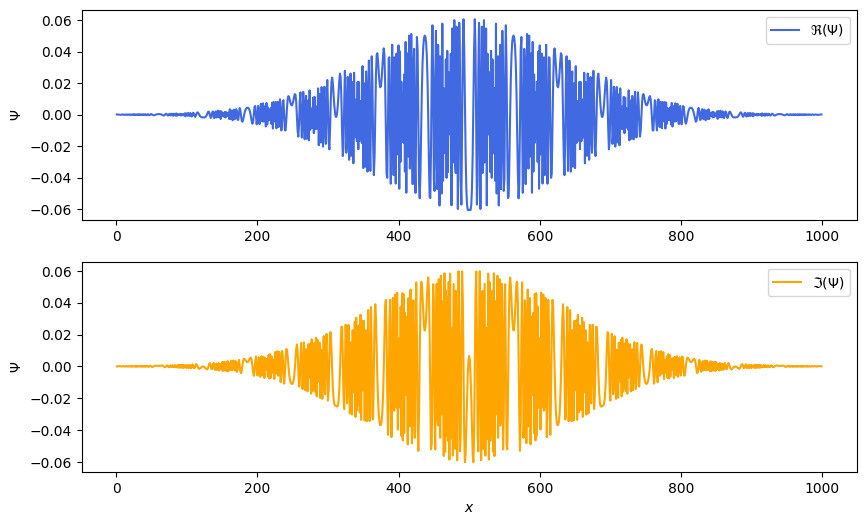

In [273]:
# Plotting 
fig, ax = plt.subplots(2, 1, figsize=(10,6))

ax[0].plot(x[1:-1], Psi_real, color="royalblue", label=r'$\Re(\Psi)$')
ax[1].plot(x[1:-1], Psi_imag, color="orange", label=r'$\Im(\Psi)$')

ax[1].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$\Psi$')
ax[1].set_ylabel(r'$\Psi$')

ax[0].legend()
ax[1].legend()
plt.show()

## Quantum Tunneling

Let now suppose that a quantum particle is traveling in a given direction $x$ with kinetic energy $E$ and encounters a potential barrier described by Equation the following equation:
$$
V(x) = \begin{cases}
V_0 \ \ \text{if} \ \ a < x < a+w \\
0 \ \ \text{otherwise}
\end{cases}
$$
i.e. describing a rectangular potential barrier. What is the probability that the particle will tunnel through the potential barrier? The answer can be found by solving a boundary-value problem for the time-independent Schrӧdinger equation similarly to the one defined above:
$$
-\frac{\hbar^2}{2m}\frac{d\psi}{dx^2} + V(x)\psi(x) = \epsilon \psi(x)
$$
We assume that the given energy $E$ of the incoming particle is smaller than the height $V_0$ of the potential barrier, since this is the interesting physical case. Our task is to solve the above Schrodinger equation, looking for a solution that must be continiuous and possess continuous first derivative at all $x$, i.e. also at the boundary regions. In addition, the final solution must be given a probabilistic interpretation, namely $|\psi(x)|^2$ should be a probability density. 

Defining as 1, 2 and 3 the three different regions of the space (see the image below), we could write the following three differential equations:
$$
\begin{gather}
-\frac{\hbar^2}{2m}\frac{d\psi_1}{dx^2} = \epsilon \psi_1(x) \\
-\frac{\hbar^2}{2m}\frac{d\psi_2}{dx^2} + V(x)\psi_2(x) = \epsilon \psi_2(x) \\
-\frac{\hbar^2}{2m}\frac{d\psi_3}{dx^2} = \epsilon \psi_3(x)
\end{gather}
$$

The boundary conditions are: $\psi_1(0) = \psi_2(0)$, $\psi_2(L) = \psi_3(L)$ and similarly for the first derivatives. According to the discussion about wavepackets done before, in region 1 and 3 we can assume the solution of the equation to be in the following form:
$$
\begin{gather}
\psi_1(x) = Ae^{ikx}+Be^{-ikx} \\
\psi_3(x) = Fe^{ikx}+Ge^{-ikx} 
\end{gather}
$$
In region 1, there are two waves: one is **incident** (moving to the right) and one is **reflected** (moving to the left). Therefore, none of the constants $A$ and $B$ may vanish. On the other hand, in region 3, there is only one wave, moving to the right, which is the **transmitted** wave, so the constant $G$ must be zero. The amplitude of the incident wave will be:
$$
|\psi_{inc}(x)|^2 = |A|^2
$$
while that of the transmitted wave will:
$$
|\psi_{trans}(x)|^2 = |F|^2
$$
What we would like to know is how much of the incident wave tunnels through the barrier, therefore we are interested in the following ration known as the **tunneling probability**:
$$
\tau(L, E) = \left|\frac{F}{A}\right|^2
$$
where we have made explicit the dependence of $\tau$ on $L$, the width of the barrier, and $E$ the energy of the particle.

$$ \exp\left( - \frac{(x-x_0)^2}{2\sigma^2}\right) \exp\left(ik_0x\right)
$$

In [2]:
t = np.linspace(0.,2500,1000)
L = 750
N_grid = 750 
a = 420
V0 = 0.1
w = 50
x0 = 100
k0 = 0.4
sigma = 15

In [3]:
x = np.linspace(0,L,N_grid+1)

In [7]:
x[:10]

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [8]:
dx = x[1]-x[0]

In [9]:
def integral(f, dx, axis = 0):
    """This function allows us to approximate integrals in discrete space"""
    return np.sum(f*dx, axis = axis)

In [16]:
Psi0  = np.exp( -1/2* (x[1:-1]-x0)**2/sigma**2) *np.exp(1j*k0*x[1:-1]) 

In [17]:
#normalise the initial state
norm  = integral(np.abs(Psi0)**2, dx)
Psi0 = Psi0/np.sqrt(norm)

In [19]:
#kinetic energy
T = -1/2 * 1/dx**2 * (np.diag(-2*np.ones(N_grid-1))+ np.diag(np.ones(N_grid-2),1)+ np.diag(np.ones(N_grid-2),-1))
print(T.shape)

(749, 749)


In [21]:
#potential as a flat array
V_flat = np.array([V0 if a< pos < a+w else -0.01 for pos in x[1:-1]])

In [26]:
V_flat[:10]

array([-0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01,
       -0.01])

In [27]:
#potential energy as a diagonal matrix
V = np.diag(V_flat)

#Hamiltonian
H = T+V

In [29]:
V.shape

(749, 749)

In [30]:
#get eigenvalues and eigenvectors and normalise
E, psi = np.linalg.eigh(H)
psi = psi.T
norm = integral(np.abs(psi)**2, dx)
psi = psi/np.sqrt(norm)

In [31]:
#get expansion coeffs
c_n = np.zeros_like(psi[0], dtype=complex)
for j in range(0, N_grid-1):

    c_n[j] = integral(np.conj(psi[j]) * Psi0, dx) #for each eigenvector, compute the inner product

In [33]:
c_n.shape

(749,)

In [34]:
#get a function that returns the time dependent wavefunction
def Psi(t):
    
    return psi.T@(c_n*np.exp(-1j*E*t))

In [37]:
yreal = []
yimg = []
for i in t:
    yreal.append(np.real(Psi(i)))
    yimg.append(np.imag(Psi(i)))

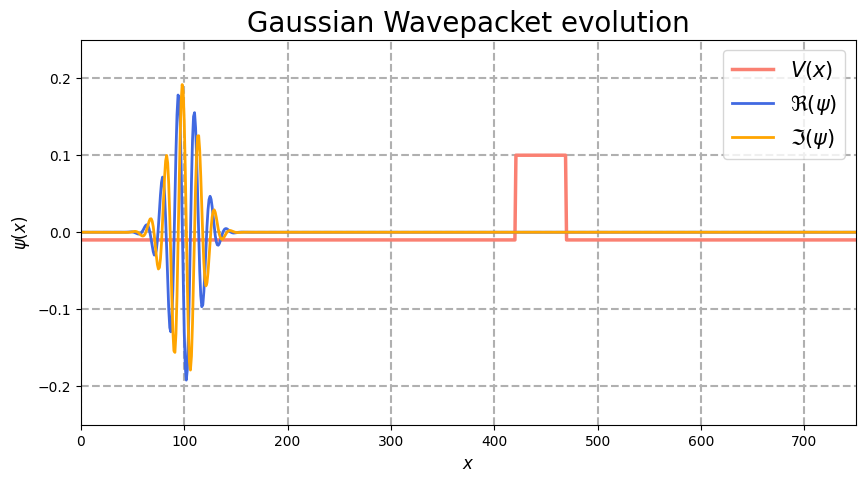

In [75]:
fig, ax = plt.subplots(figsize = (10,5))

def animate(i):   
    ax.clear()
        
    ax.plot(x[1:-1],V_flat, color="salmon", lw=2.5, label = '$V(x)$')
    ax.set_title('Gaussian Wavepacket evolution', fontsize = 20)
    ax.plot(x[1:-1],yreal[i],lw=2,color="royalblue", label = '$\Re(\psi)$')
    ax.plot(x[1:-1],yimg[i],lw=2,color="orange", label = '$\Im(\psi)$')
    ax.legend(fontsize = 15)
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel(r'$\psi(x)$', fontsize=12)
    ax.set_xlim([0,L])
    ax.set_ylim([-0.25, 0.25])
    ax.grid(ls="--", lw=1.5)

ani = FuncAnimation(fig, animate, frames=500, interval=10)
ani.save('tunneling.gif',writer='pillow',fps=50,dpi=100)